In [3]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import nltk
from nltk.tokenize.casual import casual_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from scipy.optimize import minimize

In [4]:
train = pd.read_csv('../dane/originals/train.csv')

In [5]:
train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [6]:
corpus = {}
for i in range(len(train)):
    for collId in range(1,3):
        qid = train['qid' + str(collId)][i]
        quest = train['question' + str(collId)][i]
        if qid not in corpus:
            corpus[qid] = quest

In [7]:
lemmatizer = WordNetLemmatizer()
def custom_tokenize(text):
    tokens = casual_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token.lower() for token in tokens]
    return tokens

In [8]:
items = list(corpus.values())

In [15]:
model = TfidfVectorizer(tokenizer=custom_tokenize)
data = model.fit_transform(np.array(items))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
predicted = []
answers = list(train.is_duplicate)

for i in range(len(train)):
    qId1 = int(train.qid1[i]) - 1
    qId2 = int(train.qid2[i]) - 1
    isDup = int(train.is_duplicate[i])
    dot = np.dot(data[qId1].toarray()[0], data[qId2].toarray()[0])
    predicted.append(dot)

In [17]:
def min_function(x, y_true, y_pred):
    y_pred_binary = (y_pred > x).astype(int)
    return np.mean((y_true - y_pred_binary) ** 2)

result = minimize(min_function, 0.2, args=(np.array(answers), np.array(predicted)), method='L-BFGS-B', bounds=[(0, 1)])
print(result.x[0])

0.2


In [18]:
min_function(0, np.array(answers), np.array(predicted))

0.6304657547799847

In [19]:
predicted1or0 = [1 if x > 0.5 else 0 for x in predicted]

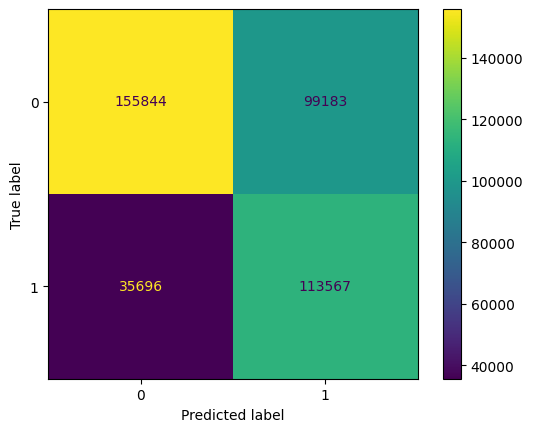

In [20]:
cm = confusion_matrix(answers, predicted1or0)
cm_display = ConfusionMatrixDisplay(cm).plot()